In [1]:
#Importing Liabraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Importing Dataset

path = r'C:\Users\ranji\Boat Analysis'
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'boats_filtered.csv'), index_col = 0)

In [3]:
#Displaying maps in notebook

%matplotlib inline

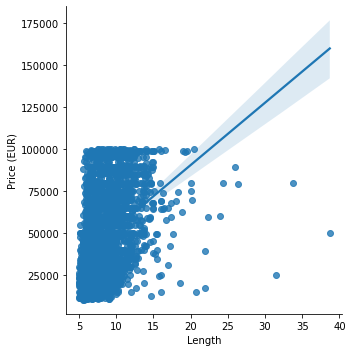

In [4]:
# Scatterplot between Price and number of views

sns.lmplot(x = 'Length', y = 'Price (EUR)', data = df)

## Hypothesis: When the Length increases, the price of the boat also increases.

In [6]:
# Preparing for regression analysis by reshaping the variables into NumPy arrays and putting them into separate objects.

X = df['Length'].values.reshape(-1,1)
y = df['Price (EUR)'].values.reshape(-1,1)

In [7]:
X

array([[6.  ],
       [6.18],
       [7.  ],
       ...,
       [5.6 ],
       [5.5 ],
       [5.7 ]])

In [8]:
y

array([[10400],
       [11000],
       [11000],
       ...,
       [10400],
       [10300],
       [10200]], dtype=int64)

In [9]:
#Splitting data into Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
# Regression Analysis - Creating a regression object

regression = LinearRegression()

In [11]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

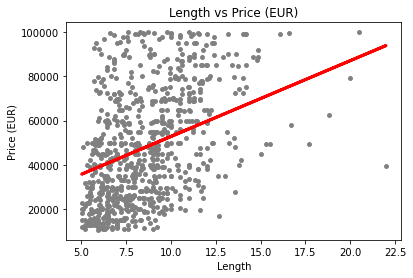

In [13]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Length vs Price (EUR)')
plot_test.xlabel('Length')
plot_test.ylabel('Price (EUR)')
plot_test.show()

In [14]:
# Model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [15]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3427.64075806]]
Mean squared error:  531157876.6762127
R2 score:  0.17775216349582879


## Interpretation

From the diagram, the regression line matches the hypothesis where the more length on the boat, the higher the price. The positive Slope of 3247 also confirms this relationship.

The very large MSE shows a large gap between the prediction model and the actual numbers.

The R2 score further confirms that the Length is not a major factor affecting the Price and there could potentially be other variables affecting this as well.

In [16]:
# Dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,24990,56269.299337
1,34900,52841.658578
2,44900,44409.662314
3,94000,59525.558057
4,62495,54212.714882
5,28000,48042.961517
6,69000,49242.635782
7,59900,57640.355640
8,69500,58325.883791
9,25000,46740.458029


The above numbers also confirm a large variance between the data and prediction numbers. Therefore, the prediction model does not work well and fit here.

## Data bias:

I have filtered the data to my perception of what values are considered outliers. This may be complete different 
in the real world of selling boats. 

I also see a possibility of further extreme values being present in the number of views which if removed, can improve the analysis but modify the source data too much.